In [1]:
# http://old.sebug.net/paper/books/scipydoc/wave_pyaudio.html
# Wave文件 -> 进入链接查看
import wave
import pylab as pl
import numpy as np

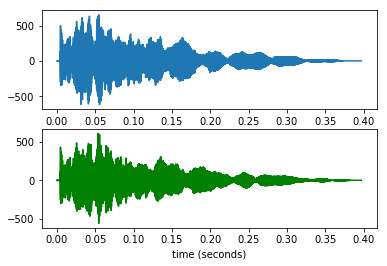

In [3]:
# 打开WAV文档
# 需要使用 ‘rb’ 二进制模式打开
# open => Wave_read类的实例
f = wave.open(r"c:\WINDOWS\Media\ding.wav", "rb")

# 读取格式信息
# getparams：一次性返回所有的WAV文件的格式信息，
# 它返回的是一个组元(tuple)：声道数, 量化位数（byte单位）, 采样频率, 采样点数, 压缩类型, 压缩类型的描述。
# wave模块只支持非压缩的数据，因此可以忽略最后两个信息
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

# 读取波形数据
# readframes：读取声音数据，传递一个参数指定需要读取的长度（以取样点为单位），
# readframes返回的是二进制数据（一大堆bytes)，在Python中用字符串表示二进制数据
str_data = f.readframes(nframes)
f.close()

# 将波形数据转换为数组
# 根据声道数和量化单位，将读取的二进制数据转换为一个可以计算的数组
wave_data = np.fromstring(str_data, dtype=np.short)

# 通过fromstring函数将字符串转换为数组，通过其参数dtype指定转换后的数据格式，
# 由于我们的声音格式是以两个字节表示一个取样值，因此采用short数据类型转换。
# 现在我们得到的wave_data是一个一维的short类型的数组，但是因为我们的声音文件是双声道的，
# 因此它由左右两个声道的取样交替构成：LRLRLRLR....LR（L表示左声道的取样值，R表示右声道取样值）
wave_data.shape = -1, 2

# 转置
wave_data = wave_data.T
# 通过取样点数和取样频率计算出每个取样的时间：
time = np.arange(0, nframes) * (1.0 / framerate)

# 绘制波形
pl.subplot(211)
pl.plot(time, wave_data[0])
pl.subplot(212)
pl.plot(time, wave_data[1], c='g')
pl.xlabel('time (seconds)')
pl.show()
# WindowsXP的经典"叮"声的波形